In [11]:
%pip install tensorflow

  Using cached tensorflow-2.12.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp310-cp310-win_amd64.whl (272.8 MB)
  Using cached jax-0.4.8-py3-none-any.whl
  Using cached grpcio-1.53.0-cp310-cp310-win_amd64.whl (3.9 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached h5py-3.8.0-cp310-cp310-win_amd64.whl (2.6 MB)
  Using cached tensorboard-2.12.2-py3-none-any.whl (5.6 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached ml_dtypes-0.1.0-cp310-cp310-win_amd64.whl (120 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached google_auth-2.17.3-py2.py3-none-any.whl (178 kB)
  Using cached Markdown-3.4.3-py3-none-any.whl (93 kB)
  Using cached cachetools-5.3.0-py3-none-any.whl (9.3 kB)
  Using cached requests_oauthli


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
%pip install mtcnn


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
%pip install keyboard


     --------------------------------------- 58.1/58.1 kB 71.2 kB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


1/1 [==============================] - 0s 177ms/step


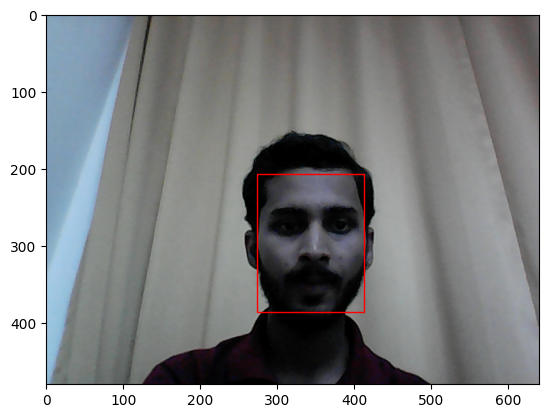

1/1 [==============================] - 0s 32ms/step


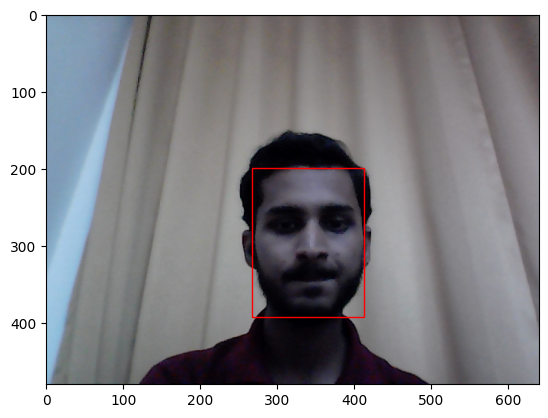

q is pressed


In [2]:
import cv2
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot
from matplotlib.patches import Rectangle
import keyboard

# draw an image with detected objects
def draw_image_with_boxes(image, result_list):
    # plot the image
    pyplot.imshow(image)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
    # show the plot
    pyplot.show()

# create the detector, using default weights
detector = MTCNN()

# capture video from webcam
cap = cv2.VideoCapture(0)

while True:
    # read the frame from the webcam
    ret, frame = cap.read()
    if not ret:
        break

    # convert frame from BGR to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # detect faces in the frame
    faces = detector.detect_faces(rgb_frame)

    # display faces on the original image
    draw_image_with_boxes(rgb_frame, faces)

    # check for user input to exit
    if keyboard.is_pressed('q'):
        print("q is pressed")
        break

# release the capture and destroy windows
cap.release()
cv2.destroyAllWindows()


In [2]:
import cv2
from mtcnn.mtcnn import MTCNN
import keyboard

# Create a MTCNN detector instance
detector = MTCNN()

# Create a VideoCapture object to capture video from the default camera
cap = cv2.VideoCapture(0)
fps = cap.get(cv2.CAP_PROP_FPS)
print(fps)
# Set the width and height of the captured video frames
cap.set(3, 640)
cap.set(4, 480)
out = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc('M','J','P','G'),10, (640, 480))
# Loop through the frames of the captured video
while True:
    # Read a frame from the video
    ret, frame = cap.read()
    
    # If there's an error reading the frame, break out of the loop
    if not ret:
        print("error in reading frame")
        break
    
    # Detect faces in the frame using the MTCNN detector
    faces = detector.detect_faces(frame)
    
    # Loop through the faces and draw bounding boxes around them
    for face in faces:
        x, y, width, height = face['box']
        cv2.rectangle(frame, (x, y), (x+width, y+height), (0, 255, 0), 2)
    # Display the frame with the bounding boxes drawn around the detected faces
    out.write(frame)
    
    # Exit the loop if the 'q' key is pressed
    if keyboard.is_pressed('q'):
        print("q is pressed")
        break
   
# Release the VideoCapture object and destroy all windows

out.release()
cap.release()
cv2.destroyAllWindows()
# Output.avi is attached in the zip file


30.0
1/1 [==============================] - 0s 44ms/step
q is pressed


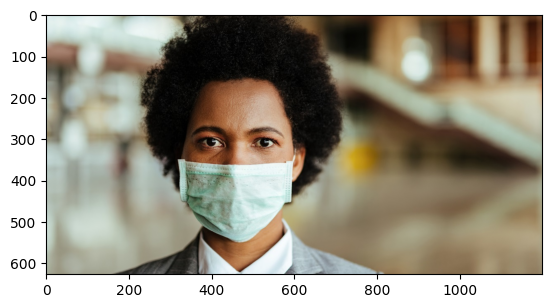

1/1 [==============================] - 0s 228ms/step


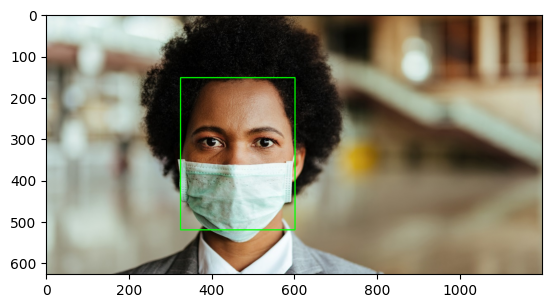

In [2]:
import matplotlib.pyplot as plt
import cv2
from mtcnn.mtcnn import MTCNN


detector = MTCNN()


img = cv2.imread("test3.jpg")
img = cv2.cvtColor(img,
                   cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()
results = detector.detect_faces(img)
if len(results)==0:
    print("No faces detected")
    exit(1)
x,y,width,height = results[0]['box']
img = cv2.rectangle(img,
                    (x,y),
                    (x+width, y+height),
                    color = (0,255, 0),
                    thickness=2)

plt.imshow(img)